<a href="https://colab.research.google.com/github/Tensai-Pro/SRI-PracticeTasks/blob/master/Word%20Embeddings/1)_Bag_of_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import seaborn as sns

from gensim.utils import simple_preprocess

import nltk;
nltk.download('stopwords');
from nltk.corpus import stopwords;
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Practice Files/train.zip')
df.head(3)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...


# Исследование датасета

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [5]:
df.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

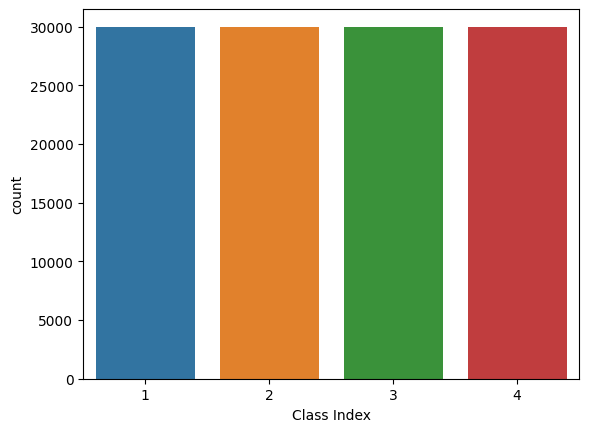

In [6]:
sns.countplot(x=df['Class Index']);

# Предобработка текста

In [7]:
stopwords = stopwords.words('english')

In [8]:
def prepare_text(text):
  tokens = simple_preprocess(text)
  stemmer = SnowballStemmer('english', ignore_stopwords=True)
  tokens = [stemmer.stem(tok) for tok in tokens if tok not in stopwords]
  return tokens

In [9]:
print(prepare_text(df.Description[5000]))
print(df.Description[5000])

['advanc', 'neuromodul', 'system', 'inc', 'report', 'friday', 'purchas', 'million', 'share', 'cyberon', 'inc', 'take', 'percent', 'stake', 'houston', 'base', 'medic', 'devic', 'maker', 'express', 'interest', 'combin', 'two', 'compani']
Advanced Neuromodulation Systems Inc. reported Friday that it purchased 3.5 million shares of Cyberonics Inc., taking a 14.9 percent stake in the Houston-based medical device maker, and expressed an interest in combining the two companies. 


In [10]:
X = df.Description
y = df['Class Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(90000,) (90000,)
(30000,) (30000,)


In [12]:
# print(X_train.tolist()[:5])

# Bag of Words

In [13]:
tf_vectorizer = CountVectorizer(tokenizer=prepare_text, lowercase=False, max_features=6000)
X_train_tf = tf_vectorizer.fit_transform(X_train.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
X_train_tf.shape

(90000, 6000)

In [15]:
X_test_tf = tf_vectorizer.transform(X_test.tolist())

In [16]:
X_test_tf.shape

(30000, 6000)

In [17]:
bow_df = pd.DataFrame(data=X_train_tf.toarray(), columns=tf_vectorizer.get_feature_names_out())

In [32]:
bow_df.head(3)

,aa,aapl,aaron,ab,abandon,abba,abbey,abc,abduct,abdul,...,zealand,zemin,zero,ziff,zimbabw,zone,zoo,zook,zurich,zvonareva
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Проверка

In [19]:
# X_train.tolist()[0]

In [20]:
# bow_df[['wind', 'stadium', 'sunday']] > 0

# Классификация

## MultinomialNB

In [21]:
clf_nb = MultinomialNB().fit(X_train_tf, y_train.tolist())

In [22]:
y_pred_nb = clf_nb.predict(X_test_tf)

In [23]:
acc_score = clf_nb.score(X_test_tf, y_test) * 100
print(f'Accuracy: {acc_score}%')

Accuracy: 88.51333333333334%


In [24]:
# Ручная проверка
y_test_list = y_test.tolist()
n_right = 0
for i in range(len(y_pred_nb)):
    if y_pred_nb[i] == y_test_list[i]:
        n_right += 1

print(f'Accuracy: {(n_right / float(len(y_test_list))) * 100}%')

Accuracy: 88.51333333333334%


In [25]:
cm_nb = confusion_matrix(y_test_list, y_pred_nb)
# cm_nb

In [26]:
# pd.DataFrame(data=cm_nb, index=clf_nb.classes_, columns=clf_nb.classes_)

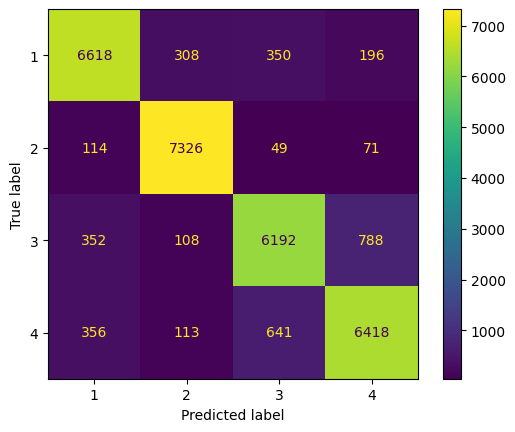

In [27]:
ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=clf_nb.classes_).plot();

## K-Nearest Neighbors (KNN)

In [28]:
clf_knn = KNeighborsClassifier(n_neighbors=15).fit(X_train_tf, y_train)

In [29]:
y_pred_knn = clf_knn.predict(X_test_tf)

In [30]:
acc_score = clf_knn.score(X_test_tf, y_test) * 100
print(f'Accuracy: {acc_score}%')

Accuracy: 58.053333333333335%


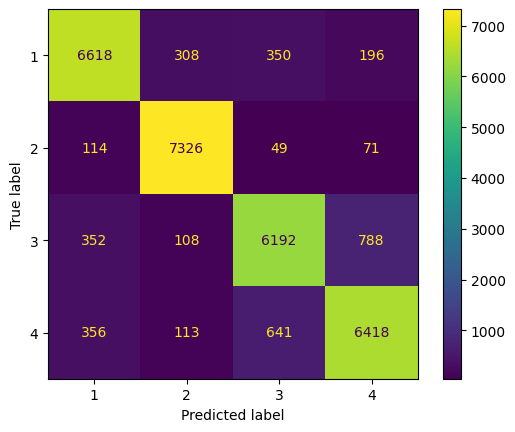

In [31]:
cm_knn = confusion_matrix(y_test_list, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=clf_nb.classes_).plot();